In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the datasets
train_df = pd.read_csv('train_data_clean.csv')
test_df = pd.read_csv('test_data_clean.csv')

In [ ]:
#Basic information
print("Train Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              5647 non-null   object 
 1   Bachelor         5647 non-null   object 
 2   Age              5647 non-null   float64
 3   Graduated        5647 non-null   object 
 4   Career           5647 non-null   object 
 5   Work Experience  5647 non-null   float64
 6   Family Expenses  5615 non-null   float64
 7   Family  Size     5647 non-null   float64
 8   Variable         5647 non-null   object 
 9   Segmentation     5647 non-null   object 
dtypes: float64(4), object(6)
memory usage: 441.3+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              2421 non-null   object

In [ ]:
print("\nTrain Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)


Train Dataset Shape: (5647, 10)
Test Dataset Shape: (2421, 9)


In [ ]:
#Display first few rows
print("\nFirst 5 rows of Train Data:")
print(train_df.head())


First 5 rows of Train Data:
      Sex Bachelor   Age Graduated            Career  Work Experience  \
0    Male       No  41.0       Yes  Fashion Designer              2.0   
1  Female      Yes  38.0       Yes                HR              0.0   
2    Male      Yes  41.0       Yes  Fashion Designer              0.0   
3    Male       No  21.0        No            Doctor              0.0   
4  Female       No  37.0       Yes  Fashion Designer              0.0   

   Family Expenses  Family  Size Variable Segmentation  
0              0.0           3.0    Dog_6       Akshat  
1              1.0           2.0    Dog_6       Akshat  
2              2.0           5.0    Dog_6      Bhavesh  
3              0.0           4.0    Dog_6        Darsh  
4              0.0           1.0    Dog_2      Bhavesh  


In [ ]:
mode_family_expenses = train_df['Family Expenses'].mode()[0]

# Fill null values in 'Family Expenses' with the calculated mode
train_df['Family Expenses'].fillna(mode_family_expenses, inplace=True)
test_df['Family Expenses'].fillna(mode_family_expenses, inplace=True)

/tmp/ipython-input-10-3379724437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Family Expenses'].fillna(mode_family_expenses, inplace=True)
/tmp/ipython-input-10-3379724437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
# Step 5: Check for missing values
print("\nMissing values in Train Data:")
print(train_df.isnull().sum())


Missing values in Train Data:
Sex                0
Bachelor           0
Age                0
Graduated          0
Career             0
Work Experience    0
Family Expenses    0
Family  Size       0
Variable           0
Segmentation       0
dtype: int64


In [ ]:
print("\nSummary Statistics for Train Data:")
print(train_df.describe(include='all'))


Summary Statistics for Train Data:
         Sex Bachelor          Age Graduated            Career  \
count   5647     5647  5647.000000      5647              5647   
unique     2        3          NaN         3                 9   
top     Male      Yes          NaN       Yes  Fashion Designer   
freq    3087     3259          NaN      3479              1742   
mean     NaN      NaN    43.446609       NaN               NaN   
std      NaN      NaN    16.719295       NaN               NaN   
min      NaN      NaN    18.000000       NaN               NaN   
25%      NaN      NaN    30.500000       NaN               NaN   
50%      NaN      NaN    40.000000       NaN               NaN   
75%      NaN      NaN    53.000000       NaN               NaN   
max      NaN      NaN    89.000000       NaN               NaN   

        Work Experience  Family Expenses  Family  Size Variable Segmentation  
count       5647.000000      5647.000000   5647.000000     5647         5647  
unique       

In [ ]:
# Step 7: Check data types
print("\nData Types:")
print(train_df.dtypes)


Data Types:
Sex                 object
Bachelor            object
Age                float64
Graduated           object
Career              object
Work Experience    float64
Family Expenses    float64
Family  Size       float64
Variable            object
Segmentation        object
dtype: object


In [ ]:
#Check class balance (if classification task)
if 'target' in train_df.columns:
    print("\nTarget Distribution:")
    print(train_df['target'].value_counts())
    sns.countplot(data=train_df, x='target')
    plt.title("Target Class Distribution")
    plt.show()

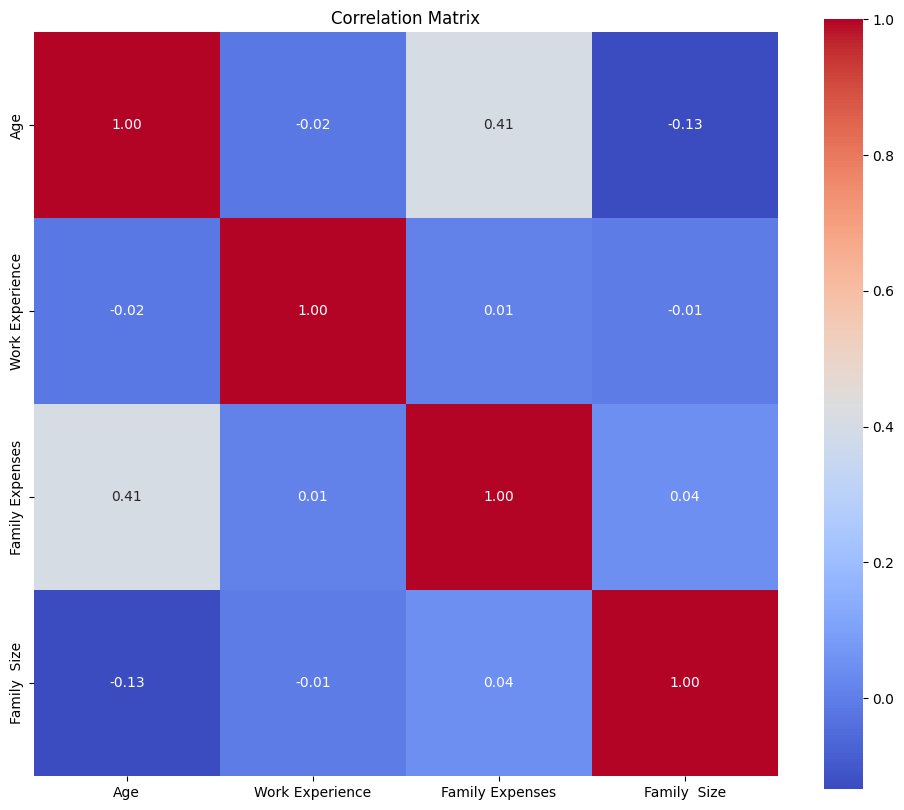

In [ ]:
# Step 9: Correlation matrix
plt.figure(figsize=(12, 10))
# Select only numeric columns before calculating correlation
numeric_train_df = train_df.select_dtypes(include=np.number)
correlation = numeric_train_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

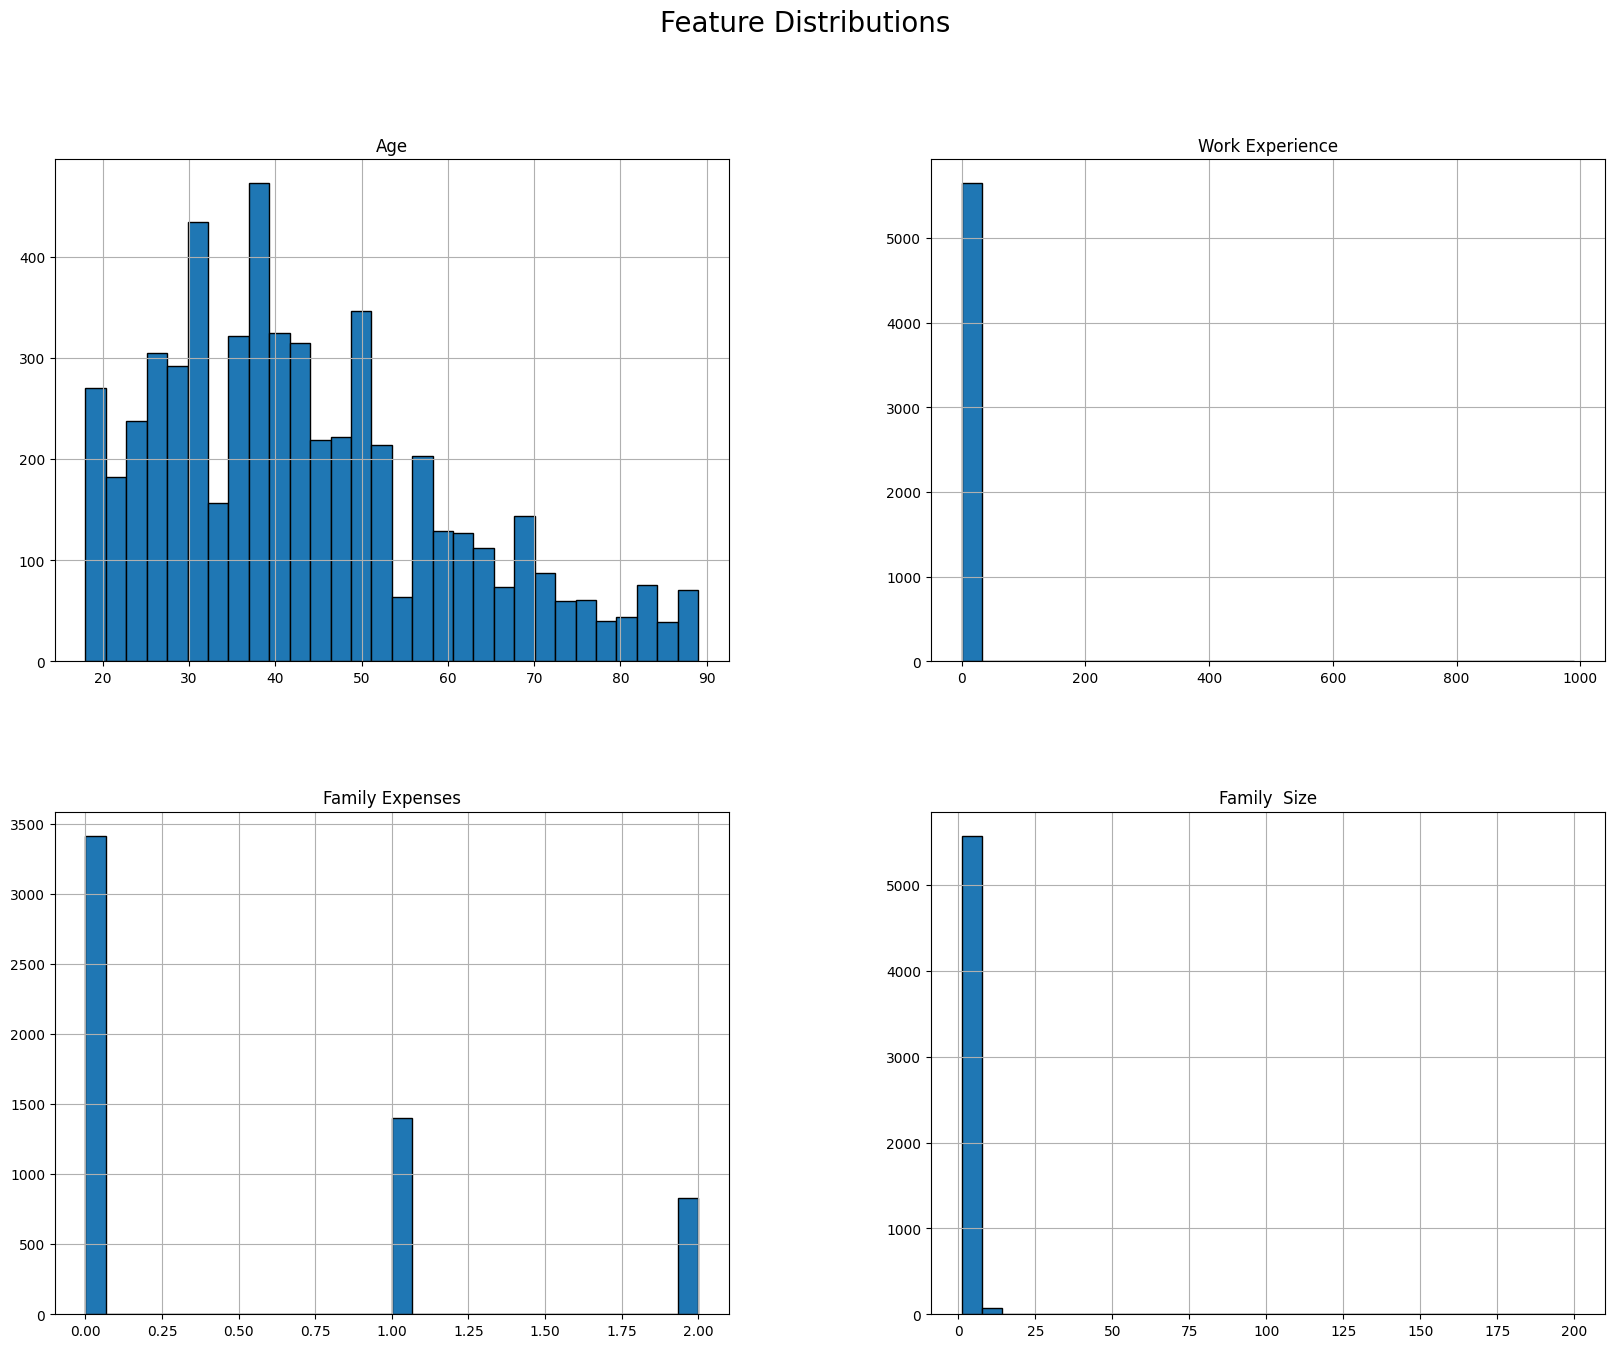

In [ ]:
# Step 10: Histograms for numerical features
train_df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()

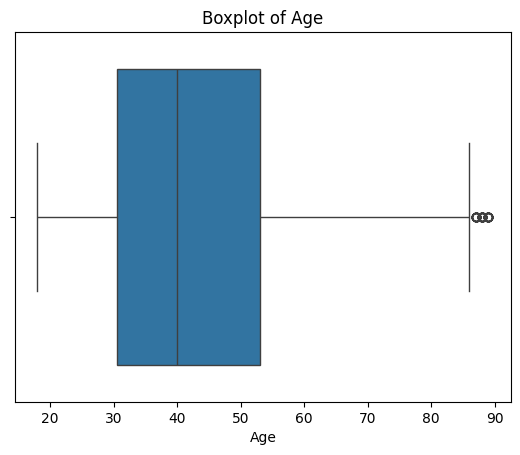

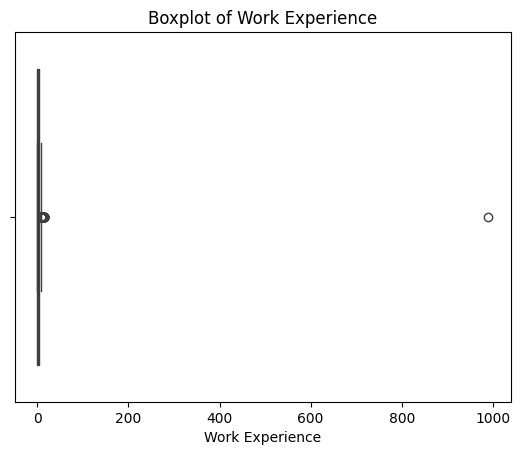

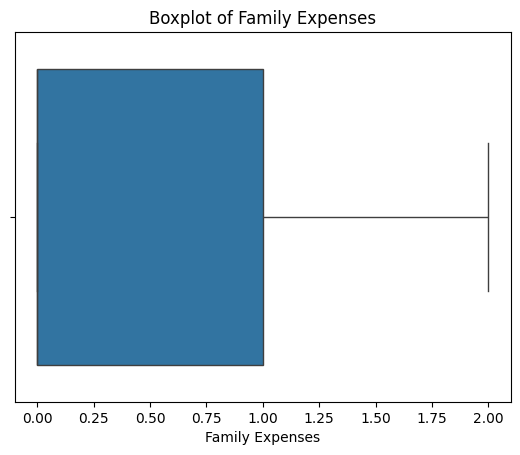

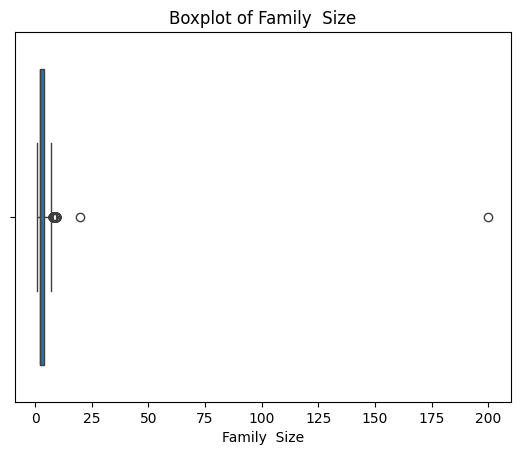

In [ ]:
# Step 11: Boxplots to detect outliers
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

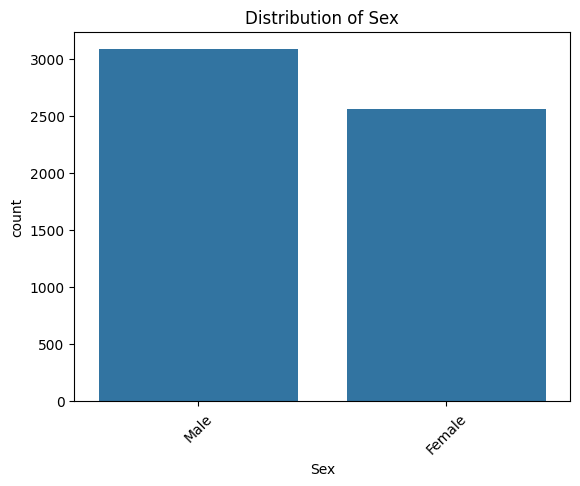

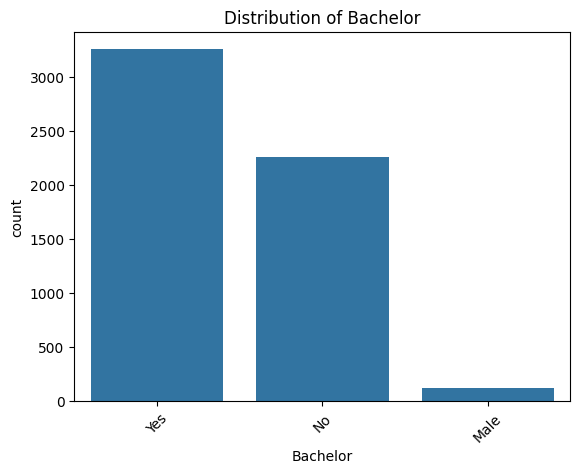

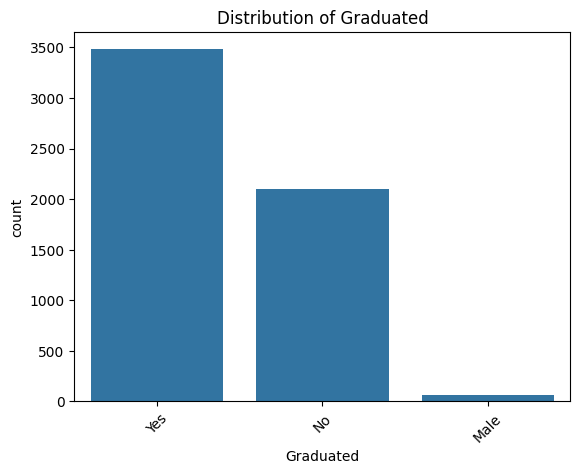

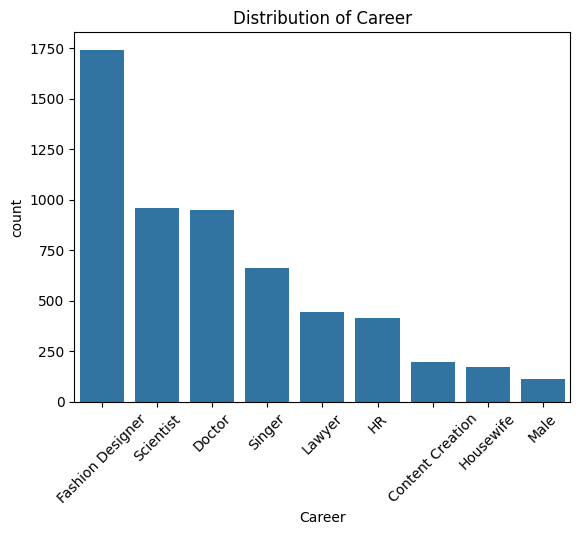

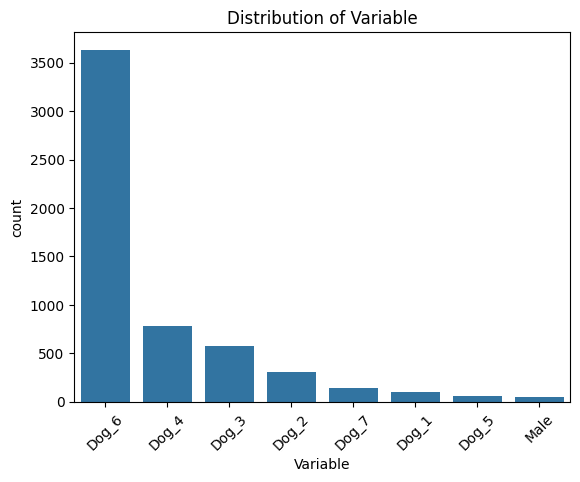

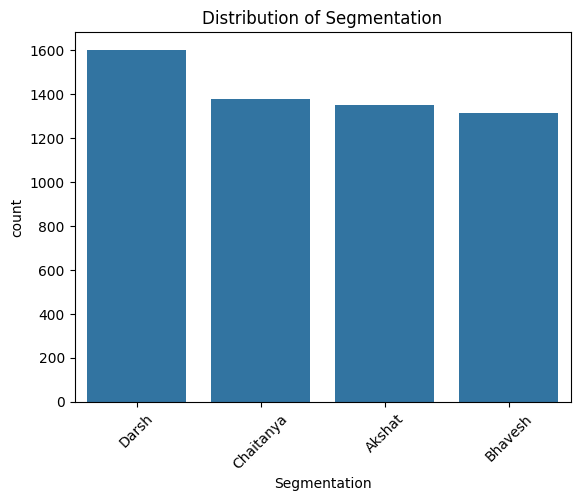

In [ ]:
# Step 13: Categorical feature analysis
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure()
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

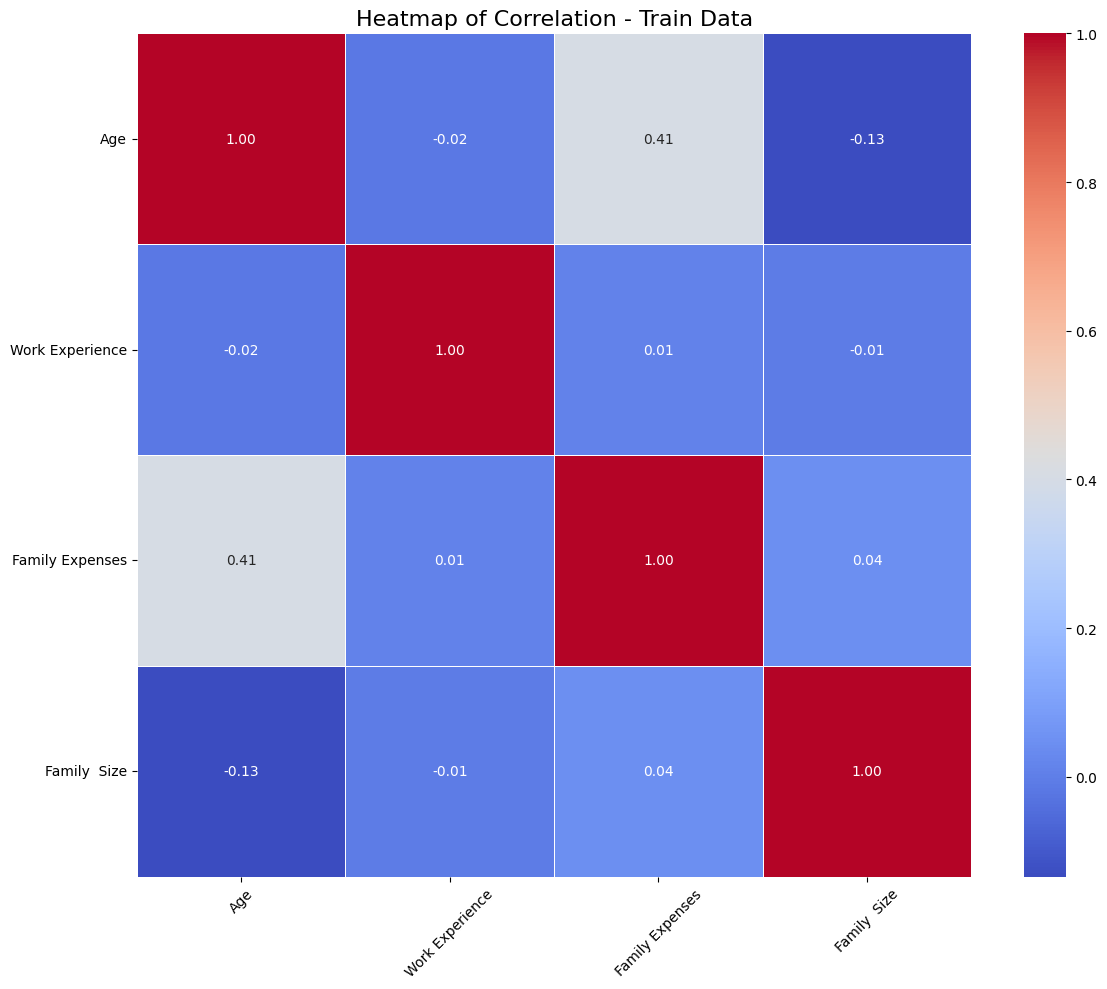

In [ ]:
# Create heatmap for Train Data
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation - Train Data", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

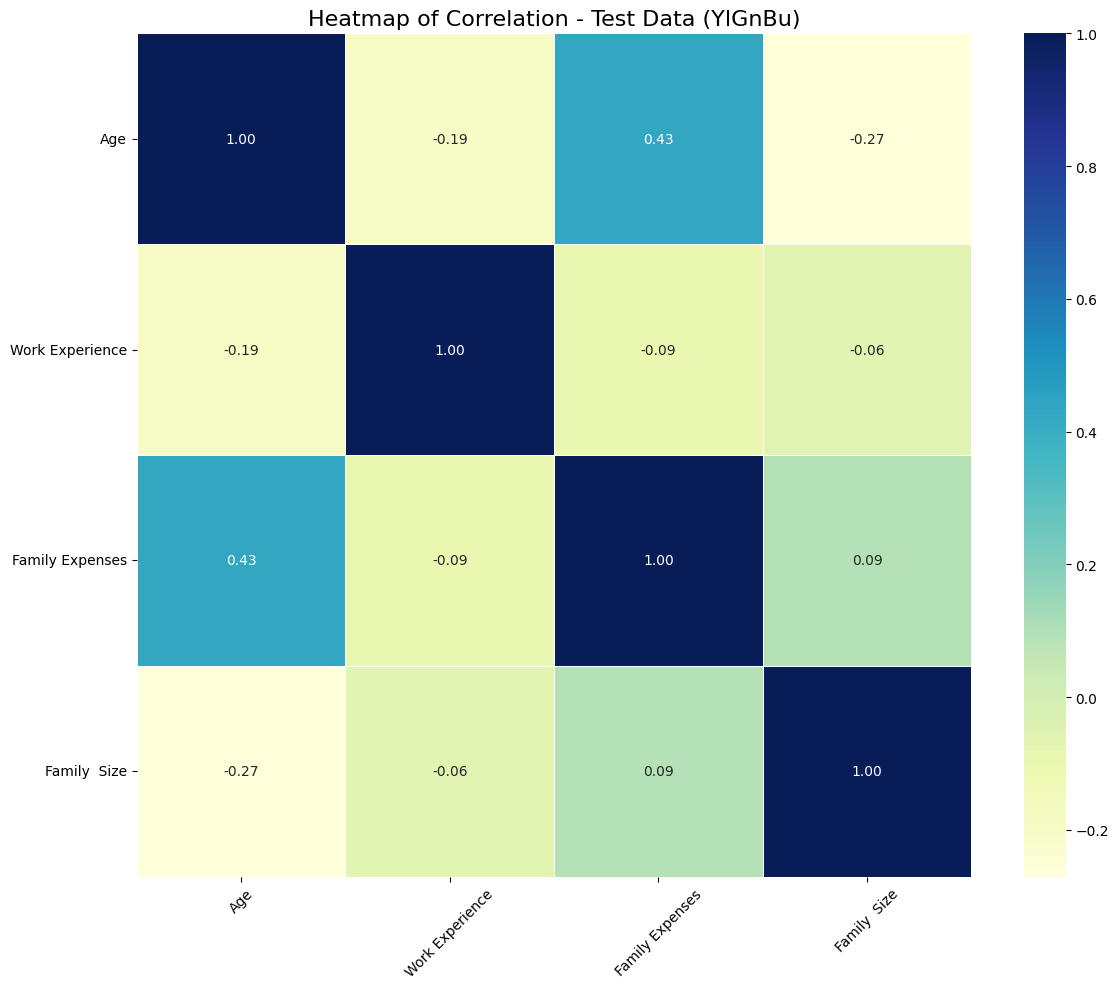

In [ ]:
# Create heatmap for Test Data
plt.figure(figsize=(12, 10))
sns.heatmap(test_df.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation - Test Data (YlGnBu)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print(train_df.columns)

Index(['Sex', 'Bachelor', 'Age', 'Graduated', 'Career', 'Work Experience',
       'Family Expenses', 'Family  Size', 'Variable', 'Segmentation'],
      dtype='object')


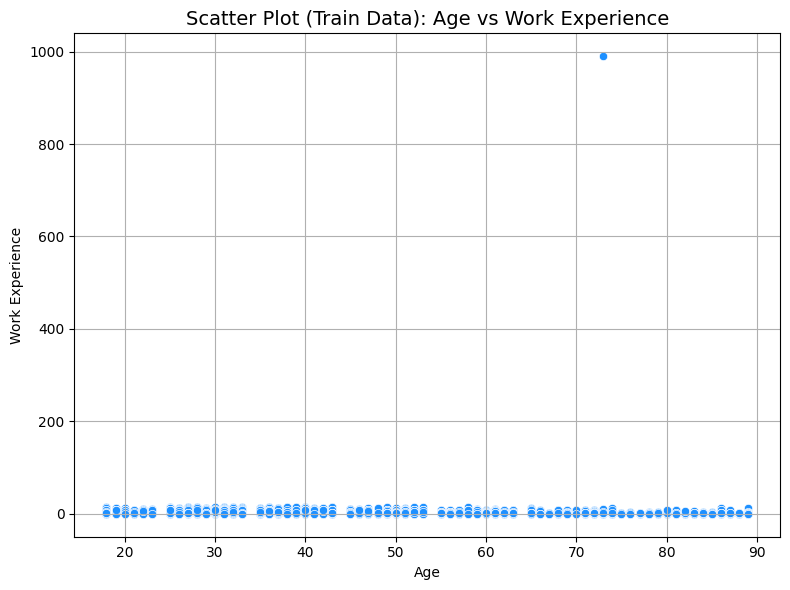

In [ ]:
feature1 = 'Age'
feature2 = 'Work Experience'  # or 'Family Expenses'

# Train data scatter plot (blue)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x=feature1, y=feature2, color='dodgerblue')
plt.title(f"Scatter Plot (Train Data): {feature1} vs {feature2}", fontsize=14)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.tight_layout()
plt.show()

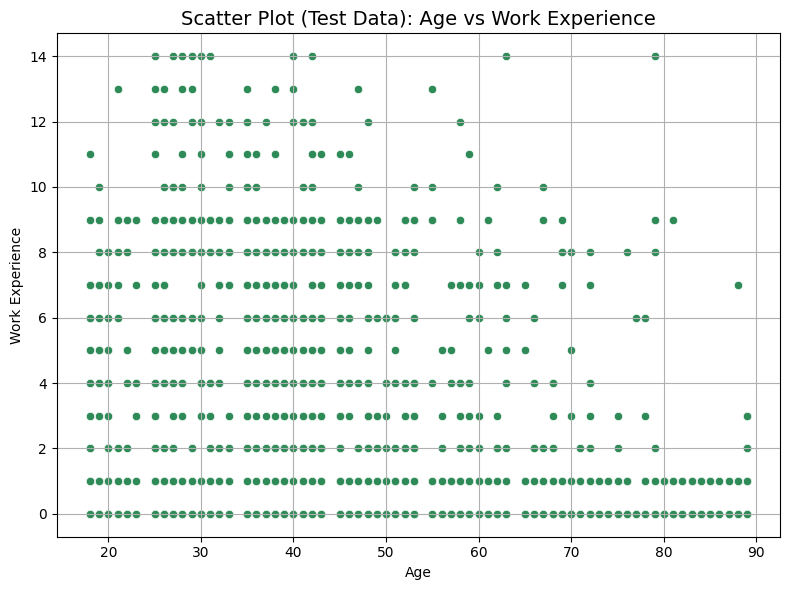

In [ ]:
# Test data scatter plot (green)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_df, x=feature1, y=feature2, color='seagreen')
plt.title(f"Scatter Plot (Test Data): {feature1} vs {feature2}", fontsize=14)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.tight_layout()
plt.show()